# Optimization & Training
Keras 사용 

In [1]:
import tensorflow as tf
from tensorflow.keras import layers

from tensorflow.keras import datasets
import numpy as np

# 학습과정 돌아보기
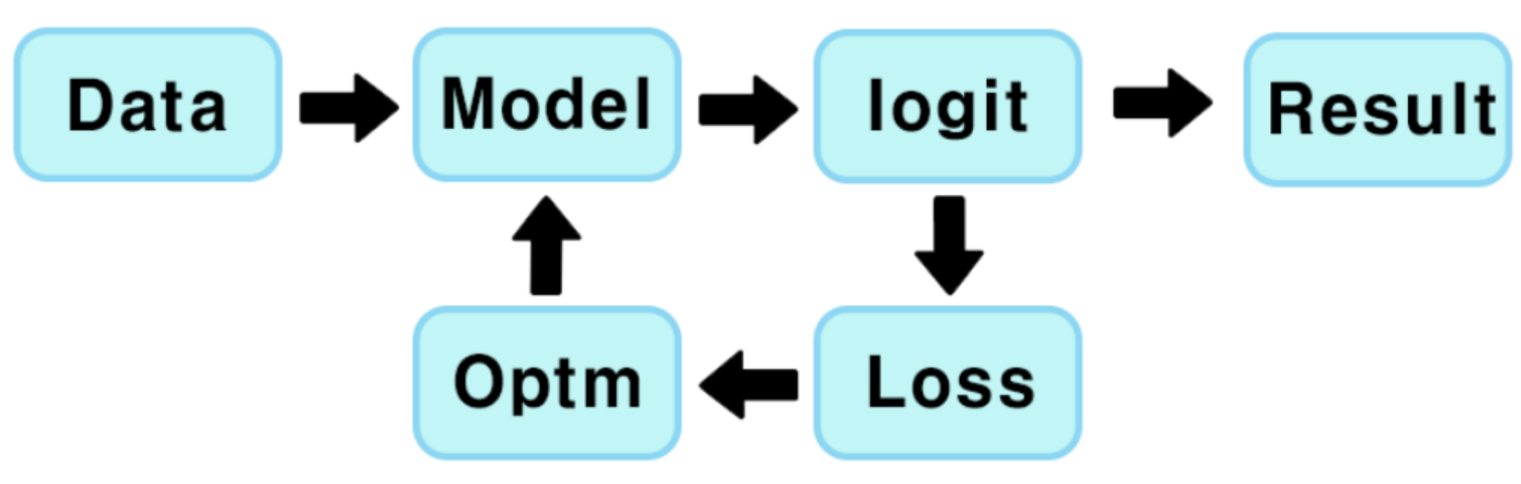

## Build Model

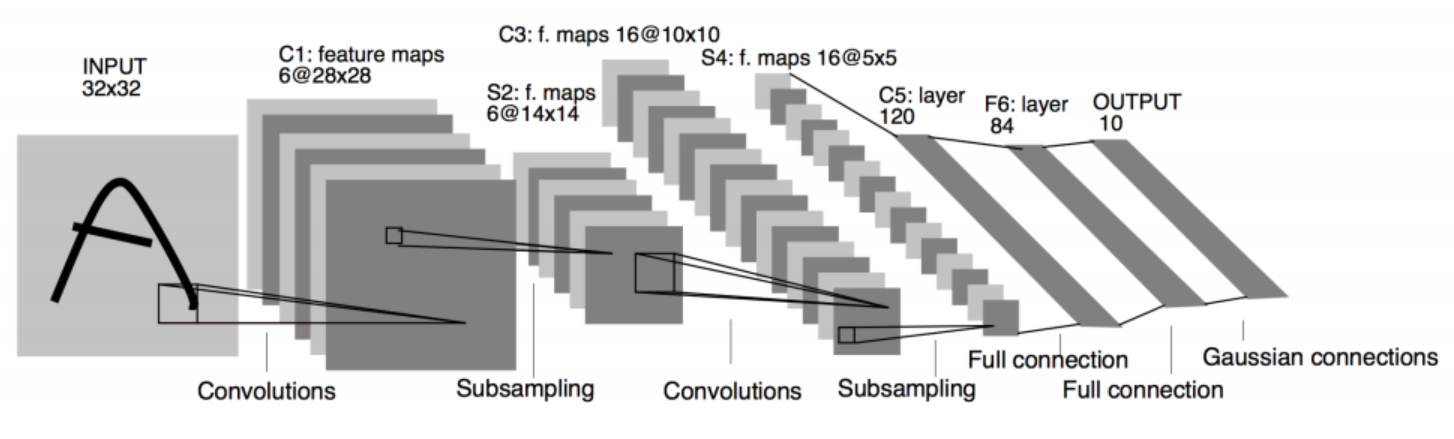

In [63]:
inputs = layers.Input((28, 28, 1))
net = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.5)(net)
net = layers.Dense(10)(net)  # num_classes
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

---
# 모델 학습전에 설정할 것들

1. Loss Function
2. Optimization
3. Metics

---
# Loss Function  
손실계산 함수, 어떤 Loss Function 을 선택할까 ? 방법 확인

https://keras.io/ko/losses/

In [4]:
# 이번 예제에선 Cross Entropy 라는 Loss Function 을 사용하겠습니다.

# Cross Entropy 는 크게 2가지가 있습니다.
#    1. Categorical : ex)  , ....
#    2. Binary : ex) 개/고양이, 있다 / 없다

### Categorical vs. Binary

1. Cross Entropy
    1. categorial_crossentropy
        1. sparse_categorical_crossentropy      
    1. binary_crossentropy

In [ ]:
# 일전에 우리가 one-hot encoding 을 사용해서 데이터를 다루어 봤다.

# 가령 class 가 5개이면
# [1, 0, 0, 0, 0]
# [0, 1, 0, 0, 0]
# [0, 0, 1, 0, 0]
# [0, 0, 0, 1, 0]
# [0, 0, 0, 0, 1]

In [5]:
# one-hot encoding ,을 사용할때는
tf.keras.losses.categorical_crossentropy

<function tensorflow.python.keras.losses.categorical_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0)>

In [6]:
# one-hot encoding 을 사용하지 않는 경우
tf.keras.losses.sparse_categorical_crossentropy

<function tensorflow.python.keras.losses.sparse_categorical_crossentropy(y_true, y_pred, from_logits=False, axis=-1)>

In [7]:
# binary 사용시
tf.keras.losses.binary_crossentropy

<function tensorflow.python.keras.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0)>

MNIST 는 클래스가 10개다.  그래서 categorical_crossentropy 를 사용할것이데...

그런데, 굳이 one-hot encoding 은 안하려 한다.

그래서 sparse_categorical_crossentropy 를 사용하자

In [20]:
# loss function 지정!
loss_func = tf.keras.losses.sparse_categorical_crossentropy

# 정답을 0, 1, 5, 2  <-- 이런식으로 주어도 된다.

# Metrics  

'모델을 평가하는 방법'

https://keras.io/ko/metrics/

In [8]:
# 모델을 평가하는 방법에는 f1 score 라든지, accuracy, precision, recall 등등 있다.
# 그중에서 흔히 사용하는 metrics 는 'accuracy' 입니다.

# 'accuracy란?'
# 가령 시험에서 10개중 9개를 맞추면 90% 라 하죠.
# '전체 개수' 에서 '맞춘 확률' 을 accuracy 라 합니다.


## tf.keras.metrics

In [11]:
# metrics 들
tf.keras.metrics.Accuracy()
tf.keras.metrics.Precision()
tf.keras.metrics.Recall()

### metrics 를 준비하는 방법들

In [12]:
# 방법1
metrics = [tf.keras.metrics.Accuracy()]

In [13]:
# 방법2
metrics = ['accuracy']

In [14]:
# metrics 는 여러개 줄수 있다.  list 형태다!
# metrics = ['accuracy', 'recall', 'precision']   <-- 이와 같이 여러개를 줄수도 있다.

# Optimizer
손실값으로부터 모델을 업데이트하는 방식

- 대표적인 Optimizer 들 
    - 'SGD' : 확률적 경사 하강법(Stochastic Gradient Descent, SGD) 옵티마이저
    - 'RMSprop' : 일반적으로 순환 신경망(Recurrent Neural Networks)의 옵티마이저로 많이 사용됨
    - 'Adam'
    
https://keras.io/ko/optimizers/


In [17]:
tf.keras.optimizers.SGD()
tf.keras.optimizers.RMSprop()
tf.keras.optimizers.Adam()

In [18]:
optm = tf.keras.optimizers.Adam()

# Compile

이상으로  모델, loss, metrics, optimizer 를 정해주었다.

이렇게 정해준걸로 준비 끝나는게 아니라.

keras 에선 이들을 compile 해주어야 한다.

In [64]:
model.compile(
    optimizer=optm,
    loss=loss_func,
    metrics=metrics
)

In [22]:
# 혹은 이렇게 해도 된다.
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=[tf.keras.metrics.Accuracy()]
)

In [23]:
model.compile(
    optimizer=optm,
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

In [24]:
# 여기까지가 Optimizatoin 까지 끝냄.

# model 만드는거에 비하면 간단하죠?
# (사실 keras 가 많이 구현해 놓았기 때문에...  쉽게 사용하는 것이다)


# 우리가 '데이터' 는 이미 로딩을 해놓았다.
# 이 데이터 들을 모델에 집어 넣어야 하는데
# 데이터도 그냘 막 집어 넣는게 아니다. 

## MNIST datasets 준비

In [49]:
(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

In [50]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [51]:
# 입력해야 하는 데이터는 4차원
# (60000, 28, 28)  <-- 3차원이다..
# RGB가 아니라 gray 라서 채널이 없다.

# 차원을 늘려주어야 한다.  (RGB였다면 이미 채널이 하나 더 있어을터라 신경 안써도 된다.)

In [52]:
# 차원 늘리는 방법 01_2 참조

In [53]:
train_x = train_x[..., tf.newaxis]
test_x = test_x[..., tf.newaxis]

In [54]:
train_x.shape, test_x.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

# Rescaling
normalization

In [55]:
np.min(train_x), np.max(train_x)

(0, 255)

In [56]:
# 위 값의 범위를 rescaling 한다.

# 범위의 값들이 너무 '틔지' 않게 하기 위해.   (255은 너무 확확 커진다
# rescaling 을 해준다.   그래야 학습도 잘 된다.
# rescaling 은 한번 해주도록 하자.

# (0, 255) => (0, 1.0) 사이로 rescaling 해주자!  ( Normalization ..)

In [57]:
train_x = train_x / 255
test_x = test_x / 255

In [61]:
np.min(train_x), np.max(train_x), np.min(test_x), np.max(test_x)

(0.0, 1.0, 0.0, 1.0)

In [ ]:
# 이제 데이터를 넣어줄 준비가 되었다!

---
# Training

## 학습용 Hyperparameter 설정

- **num_epochs**  :  
    - '전체 데이터(들)'을 '한번' 쭉 보았다면 그게 1 epoch 이다 .   
    - 문제집을 한번 다 풀어보았다면 그것이 한 epoch 다.   
    - 한번 더 보면 epoch 2 이다.  
    - 머신러닝은 수천번 ~ 수십만 epoch 도 본다.


- **batch_size** : 
    - 한 epoch 을 가기 위해서, '한번' 에 보는게 아니라 batch_size 만큼 본다 (메모리 한계 때문이다)  
    - batch_size 만큼 한 모델에 넣어주게 된다.  컴퓨터에서 이미지를 수만개? 이렇게 열어볼수 없다.  
    - 일정개수 열어보고 닫고 다음 이미지들 열어보고, 닫고 를 해야 한다.  
    - 메모리의 효율적인 운용을 위해서 batch_size 를 준다.   
    - 한 모델에 '한번'에 들어가는 데이터의 개수가 batch_size 다! 

In [36]:
num_epochs = 1  

# ※ MNIST 는 어려운 데이터가 아니라.. 1번만 epoch 주어도 학습효과는 기대할수 있다.

In [35]:
batch_size = 32

In [39]:
train_y.shape

(60000,)

In [59]:
train_y[0]

5

## model.fit()

In [65]:

model.fit(train_x, train_y,
         batch_size = batch_size,
         epochs=num_epochs,
         shuffle=True   # 반드시 shuffle 해주자.
         )


1875/1875 [==============================] - 130s 69ms/step - loss: 0.1507 - accuracy: 0.9532


# Check History  
학습 과정(History) 결과 확인

https://keras.io/ko/callbacks/#history

In [66]:
hist = model.fit(train_x, train_y,
         batch_size = batch_size,
         epochs=num_epochs,
         shuffle=True   # 반드시 shuffle 해주자.
         )

1875/1875 [==============================] - 125s 67ms/step - loss: 0.0632 - accuracy: 0.9804


In [67]:
hist

In [68]:
hist.epoch

[0]

In [69]:
hist.history

{'loss': [0.0631796196103096], 'accuracy': [0.9804499745368958]}

In [70]:
hist.params

{'verbose': 1, 'epochs': 1, 'steps': 1875}